<a href="https://colab.research.google.com/github/megha-puthukudi/main-project/blob/main/yolov8_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
pip install ultralytics


In [4]:
from ultralytics import YOLO
from matplotlib import pyplot as plt
from PIL import Image

In [5]:
model = YOLO('yolov8n-seg.yaml')
model = YOLO('yolov8n-seg.pt')

In [6]:
%cat /content/drive/MyDrive/yolo8_segmentation/dataset.yaml

train: /content/drive/MyDrive/yolo8_segmentation/train
val: /content/drive/MyDrive/yolo8_segmentation/val
nc: 1
names: ["damage"]

In [7]:
import yaml
with open("/content/drive/MyDrive/yolo8_segmentation/dataset.yaml", 'r') as stream:
    num_classes = str(yaml.safe_load(stream)['nc'])

In [8]:
#Define a project --> Destination directory for all results
project = "/content/drive/MyDrive/yolo8_segmentation/results"
#Define subdirectory for this specific training
name = "200_epochs-" #note that if you run the training again, it creates a directory: 200_epochs-2


In [ ]:
results = model.train(data='/content/drive/MyDrive/yolo8_segmentation/dataset.yaml',
                      project=project,
                      name=name,
                      epochs=100,
                      patience=0, #I am setting patience=0 to disable early stopping.
                      batch=4,
                      imgsz=800)

Ultralytics YOLOv8.1.46 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolov8n-seg.pt, data=/content/drive/MyDrive/yolo8_segmentation/dataset.yaml, epochs=100, time=None, patience=0, batch=4, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=/content/drive/MyDrive/yolo8_segmentation/results, name=200_epochs-6, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_t

train: Scanning /content/drive/MyDrive/yolo8_segmentation/train/labels... 315 images, 11 backgrounds, 0 corrupt: 100%|██████████| 326/326 [00:59<00:00,  5.44it/s]


train: New cache created: /content/drive/MyDrive/yolo8_segmentation/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/drive/MyDrive/yolo8_segmentation/val/labels... 30 images, 0 backgrounds, 0 corrupt: 100%|██████████| 30/30 [00:26<00:00,  1.12it/s]

val: New cache created: /content/drive/MyDrive/yolo8_segmentation/val/labels.cache


Plotting labels to /content/drive/MyDrive/yolo8_segmentation/results/200_epochs-6/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 66 weight(decay=0.0), 77 weight(decay=0.0005), 76 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 800 train, 800 val
Using 2 dataloader workers
Logging results to /content/drive/MyDrive/yolo8_segmentation/results/200_epochs-6
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      1/100      1.25G      1.817      4.257      3.426      2.074          5        800: 100%|██████████| 82/82 [00:20<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.25it/s]

                   all         30         30     0.0806      0.567      0.147     0.0354     0.0316      0.533     0.0644     0.0128



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      2/100      1.25G      1.965      4.057      3.283      2.222          4        800: 100%|██████████| 82/82 [00:16<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.70it/s]

                   all         30         30       0.12        0.3     0.0827     0.0205     0.0905        0.1     0.0347    0.00671



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      3/100      1.29G      1.967      3.945      3.175      2.255          5        800: 100%|██████████| 82/82 [00:16<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.41it/s]

                   all         30         30      0.138      0.167     0.0785     0.0271     0.0887     0.0667     0.0242    0.00467



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      4/100      1.27G      2.075      4.124      3.077      2.307          3        800: 100%|██████████| 82/82 [00:16<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.91it/s]

                   all         30         30      0.082      0.167      0.063     0.0165     0.0554        0.2     0.0292    0.00697



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      5/100      1.25G      2.089      4.083       3.04      2.302          5        800: 100%|██████████| 82/82 [00:16<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.97it/s]

                   all         30         30     0.0325      0.333     0.0176    0.00419     0.0198     0.0667    0.00656     0.0013



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      6/100      1.25G      2.066      4.147      2.912      2.264          4        800: 100%|██████████| 82/82 [00:15<00:00,  5.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.95it/s]

                   all         30         30      0.187        0.2      0.127     0.0352       0.13      0.133      0.113      0.029



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      7/100      1.23G      2.022      3.972      2.884      2.217          4        800: 100%|██████████| 82/82 [00:15<00:00,  5.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.25it/s]

                   all         30         30      0.243      0.367      0.178      0.052      0.163      0.273     0.0766     0.0186



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      8/100      1.36G      2.054      4.109      2.853      2.323          6        800: 100%|██████████| 82/82 [00:16<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.48it/s]

                   all         30         30      0.151        0.3      0.141     0.0501      0.538      0.133       0.14     0.0335



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      9/100      1.24G      2.002      3.952      2.701      2.241          8        800: 100%|██████████| 82/82 [00:15<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.80it/s]

                   all         30         30      0.246      0.467      0.194     0.0493     0.0913      0.167     0.0657     0.0144



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     10/100      1.34G      1.966      3.892      2.703      2.239          7        800: 100%|██████████| 82/82 [00:15<00:00,  5.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.19it/s]

                   all         30         30      0.246      0.267       0.18     0.0538      0.352      0.233       0.21      0.051



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     11/100      1.25G      1.947      3.884      2.609      2.227          3        800: 100%|██████████| 82/82 [00:15<00:00,  5.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.40it/s]

                   all         30         30      0.166        0.4      0.165      0.052      0.185      0.233      0.131     0.0343



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     12/100      1.24G      1.941      3.863      2.588      2.187          6        800: 100%|██████████| 82/82 [00:16<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.23it/s]


                   all         30         30      0.182      0.333      0.114     0.0463      0.277      0.367      0.143     0.0273

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     13/100      1.36G      1.886      3.868      2.567      2.183          4        800: 100%|██████████| 82/82 [00:15<00:00,  5.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.06it/s]

                   all         30         30      0.224        0.3      0.163     0.0401     0.0883        0.2     0.0466     0.0108



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     14/100      1.36G      1.884      3.759      2.595      2.175          5        800: 100%|██████████| 82/82 [00:15<00:00,  5.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.03it/s]

                   all         30         30      0.191        0.3      0.146     0.0473      0.209      0.167      0.104     0.0198



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     15/100      1.21G      1.866      3.749      2.569      2.182          4        800: 100%|██████████| 82/82 [00:15<00:00,  5.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.70it/s]

                   all         30         30      0.263      0.467      0.223     0.0752      0.306      0.339      0.193     0.0498



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     16/100      1.24G      1.776      3.649      2.416      2.049          6        800: 100%|██████████| 82/82 [00:15<00:00,  5.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.22it/s]

                   all         30         30      0.387      0.367      0.349      0.096      0.416      0.267      0.236     0.0558



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     17/100      1.36G      1.837      3.723      2.466      2.158          4        800: 100%|██████████| 82/82 [00:16<00:00,  5.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.34it/s]

                   all         30         30      0.292      0.333      0.226     0.0829      0.293      0.233       0.18     0.0517



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     18/100      1.22G      1.763      3.588      2.383      2.071          3        800: 100%|██████████| 82/82 [00:15<00:00,  5.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.23it/s]

                   all         30         30      0.254      0.267      0.156     0.0379      0.309        0.3      0.209     0.0368



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     19/100      1.36G      1.781      3.601      2.348      2.031          7        800: 100%|██████████| 82/82 [00:15<00:00,  5.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.96it/s]

                   all         30         30      0.422      0.267      0.284     0.0876       0.17        0.3       0.18     0.0562



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     20/100      1.36G       1.77      3.541      2.333      2.037          5        800: 100%|██████████| 82/82 [00:15<00:00,  5.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.03it/s]

                   all         30         30      0.247      0.394      0.244     0.0708      0.251      0.367      0.193     0.0393



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     21/100      1.24G      1.733      3.557      2.331      1.966          6        800: 100%|██████████| 82/82 [00:16<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.43it/s]

                   all         30         30      0.193      0.233      0.108     0.0428      0.221      0.267     0.0928     0.0242



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     22/100      1.24G       1.82      3.535      2.288      2.058          4        800: 100%|██████████| 82/82 [00:15<00:00,  5.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.38it/s]

                   all         30         30      0.369      0.367      0.366      0.117      0.399      0.267      0.209     0.0643



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     23/100      1.35G      1.788      3.475      2.324      2.085          5        800: 100%|██████████| 82/82 [00:15<00:00,  5.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.48it/s]

                   all         30         30      0.397        0.5      0.332        0.1       0.48      0.367       0.27      0.055



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     24/100      1.36G      1.758      3.453      2.203          2          5        800: 100%|██████████| 82/82 [00:15<00:00,  5.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.66it/s]

                   all         30         30      0.229      0.467      0.165     0.0594      0.321      0.233      0.169      0.041



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     25/100      1.34G      1.723      3.482       2.15      1.962          4        800: 100%|██████████| 82/82 [00:15<00:00,  5.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.42it/s]


                   all         30         30      0.269        0.4      0.322      0.101      0.613      0.267      0.279     0.0809

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     26/100      1.22G      1.671      3.329      2.088      1.918          4        800: 100%|██████████| 82/82 [00:16<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.42it/s]

                   all         30         30      0.219      0.267      0.217     0.0826      0.299      0.267      0.261     0.0627



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     27/100      1.22G      1.684      3.304        2.1      1.949          3        800: 100%|██████████| 82/82 [00:15<00:00,  5.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.87it/s]

                   all         30         30      0.376      0.533      0.329      0.116      0.394        0.3      0.296      0.083



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     28/100      1.36G      1.675      3.237      2.097      1.953          6        800: 100%|██████████| 82/82 [00:15<00:00,  5.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.19it/s]

                   all         30         30      0.377      0.433      0.345      0.121      0.294      0.333      0.229     0.0658



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     29/100      1.22G      1.665      3.309      2.091      1.902          4        800: 100%|██████████| 82/82 [00:15<00:00,  5.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.47it/s]

                   all         30         30      0.418      0.335      0.325      0.111      0.384      0.333      0.253     0.0528



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     30/100      1.36G      1.656      3.346      2.073      1.932          8        800: 100%|██████████| 82/82 [00:16<00:00,  4.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.30it/s]

                   all         30         30      0.444      0.333      0.344      0.138      0.507      0.433      0.307      0.093



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     31/100      1.23G      1.684      3.263      2.114      1.947          4        800: 100%|██████████| 82/82 [00:15<00:00,  5.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.67it/s]

                   all         30         30      0.388      0.333      0.322      0.144      0.719        0.2      0.275      0.109



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     32/100      1.24G      1.617      3.268      2.095      1.917          7        800: 100%|██████████| 82/82 [00:15<00:00,  5.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.12it/s]

                   all         30         30      0.482      0.333      0.355      0.115      0.479      0.333        0.3     0.0834



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     33/100      1.34G      1.596      3.187      1.972      1.863          4        800: 100%|██████████| 82/82 [00:15<00:00,  5.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.92it/s]

                   all         30         30      0.337        0.5      0.346     0.0993      0.298      0.333      0.245     0.0614



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     34/100      1.34G      1.644      3.278      1.982       1.89          7        800: 100%|██████████| 82/82 [00:15<00:00,  5.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.86it/s]

                   all         30         30      0.409        0.5      0.422       0.14      0.397        0.2      0.249     0.0616



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     35/100      1.24G      1.612      3.259      1.964      1.898          4        800: 100%|██████████| 82/82 [00:15<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.71it/s]

                   all         30         30      0.563      0.567      0.436      0.162      0.462      0.433      0.314      0.104



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     36/100      1.22G      1.541      3.087      1.889      1.835          4        800: 100%|██████████| 82/82 [00:15<00:00,  5.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.13it/s]

                   all         30         30      0.538      0.428      0.434      0.141      0.244      0.356      0.233     0.0686



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     37/100      1.34G      1.584      3.118      1.879      1.824          8        800: 100%|██████████| 82/82 [00:15<00:00,  5.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.49it/s]

                   all         30         30      0.359      0.542      0.398      0.131      0.324      0.433      0.259     0.0739



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     38/100      1.24G      1.587      3.063      1.883       1.83          3        800: 100%|██████████| 82/82 [00:15<00:00,  5.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.25it/s]

                   all         30         30      0.337      0.533      0.301       0.12      0.232      0.433      0.233     0.0756



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     39/100      1.21G      1.576      3.105      1.866      1.814          5        800: 100%|██████████| 82/82 [00:16<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.76it/s]

                   all         30         30      0.423      0.433      0.369      0.163      0.419      0.409      0.358       0.12



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     40/100      1.24G      1.536      3.047      1.817      1.801          4        800: 100%|██████████| 82/82 [00:15<00:00,  5.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.85it/s]

                   all         30         30      0.625      0.367      0.412      0.153      0.616        0.4      0.395      0.123



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     41/100      1.24G      1.506      3.012      1.804      1.764          5        800: 100%|██████████| 82/82 [00:15<00:00,  5.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.52it/s]

                   all         30         30      0.409      0.554      0.371      0.125      0.363        0.4      0.305     0.0839



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     42/100      1.24G      1.528      2.974      1.771      1.774          2        800: 100%|██████████| 82/82 [00:15<00:00,  5.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.54it/s]

                   all         30         30      0.596      0.433      0.485      0.141      0.635        0.4      0.439      0.122



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     43/100      1.22G      1.507      3.031      1.806       1.77          4        800: 100%|██████████| 82/82 [00:16<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.25it/s]

                   all         30         30      0.611      0.433      0.443      0.159      0.544      0.367      0.356      0.105



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     44/100      1.34G      1.506       2.93      1.766      1.786          6        800: 100%|██████████| 82/82 [00:15<00:00,  5.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.31it/s]

                   all         30         30      0.387      0.433      0.374      0.155      0.484      0.433      0.334      0.123



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     45/100      1.22G      1.445      2.865      1.715      1.709          6        800: 100%|██████████| 82/82 [00:15<00:00,  5.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.16it/s]

                   all         30         30       0.65      0.433      0.437      0.146      0.522      0.333       0.34      0.109



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     46/100      1.24G      1.489      2.953      1.762      1.726          5        800: 100%|██████████| 82/82 [00:15<00:00,  5.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.78it/s]

                   all         30         30      0.479      0.553      0.441      0.154      0.653        0.3      0.334      0.102



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     47/100      1.21G      1.499      2.962      1.792      1.758          5        800: 100%|██████████| 82/82 [00:15<00:00,  5.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.01it/s]

                   all         30         30      0.421      0.433      0.408      0.177      0.536        0.3       0.34       0.12



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     48/100      1.24G       1.44       2.86      1.684      1.691          3        800: 100%|██████████| 82/82 [00:15<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.35it/s]

                   all         30         30      0.377      0.484       0.42      0.166      0.527        0.4      0.383      0.127



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     49/100      1.34G      1.386      2.855      1.614      1.692          8        800: 100%|██████████| 82/82 [00:15<00:00,  5.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.39it/s]

                   all         30         30      0.594      0.533      0.484      0.166      0.434      0.367      0.284      0.119



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     50/100      1.36G      1.415      2.755      1.616      1.681          5        800: 100%|██████████| 82/82 [00:15<00:00,  5.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.10it/s]

                   all         30         30      0.384      0.458      0.322      0.127      0.482      0.367      0.277     0.0922



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     51/100      1.34G      1.461       2.92      1.676      1.721          4        800: 100%|██████████| 82/82 [00:15<00:00,  5.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.36it/s]

                   all         30         30      0.675        0.4      0.452       0.19      0.675        0.4        0.4      0.137



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     52/100      1.22G      1.389      2.766      1.641      1.683          5        800: 100%|██████████| 82/82 [00:16<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.52it/s]

                   all         30         30      0.528      0.567      0.504      0.186      0.512        0.4      0.397       0.12



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     53/100      1.24G      1.404      2.758      1.623      1.713          5        800: 100%|██████████| 82/82 [00:15<00:00,  5.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.53it/s]

                   all         30         30      0.434        0.5      0.437      0.189      0.418      0.467      0.383      0.116



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     54/100      1.24G        1.4      2.749      1.631      1.666          6        800: 100%|██████████| 82/82 [00:15<00:00,  5.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.58it/s]

                   all         30         30      0.721      0.467      0.514      0.178      0.606        0.3      0.366     0.0911



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     55/100      1.32G      1.426      2.797      1.611      1.698          6        800: 100%|██████████| 82/82 [00:15<00:00,  5.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.86it/s]

                   all         30         30      0.688      0.467      0.525      0.198      0.532      0.367       0.38      0.137



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     56/100      1.24G      1.334      2.723      1.537       1.62          3        800: 100%|██████████| 82/82 [00:16<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.70it/s]

                   all         30         30      0.512        0.6      0.516       0.23      0.436      0.467      0.398      0.133



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     57/100      1.34G      1.359      2.778      1.589      1.652          7        800: 100%|██████████| 82/82 [00:15<00:00,  5.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.38it/s]

                   all         30         30      0.477        0.5      0.415      0.163      0.396        0.4      0.287     0.0954



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     58/100      1.24G       1.32      2.663      1.483      1.608          3        800: 100%|██████████| 82/82 [00:15<00:00,  5.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.64it/s]

                   all         30         30      0.588        0.6      0.493      0.185      0.601      0.433      0.418      0.135



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     59/100      1.36G      1.336      2.672      1.511      1.636          6        800: 100%|██████████| 82/82 [00:15<00:00,  5.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.07it/s]

                   all         30         30      0.519      0.567      0.467      0.187      0.429      0.467      0.359      0.119



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     60/100      1.35G      1.288      2.575      1.382      1.573          4        800: 100%|██████████| 82/82 [00:15<00:00,  5.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.09it/s]

                   all         30         30      0.751      0.433      0.531       0.22      0.576      0.467      0.399      0.141



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     61/100      1.23G      1.316      2.677       1.48      1.591          5        800: 100%|██████████| 82/82 [00:16<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.12it/s]

                   all         30         30      0.674        0.4      0.479      0.179      0.426      0.446      0.368      0.121



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     62/100      1.36G      1.242      2.652      1.454      1.558          4        800: 100%|██████████| 82/82 [00:15<00:00,  5.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.64it/s]

                   all         30         30      0.462        0.4      0.387      0.154      0.501      0.433      0.366       0.11



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     63/100      1.33G      1.275       2.53      1.463      1.592          5        800: 100%|██████████| 82/82 [00:15<00:00,  5.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.10it/s]

                   all         30         30      0.717      0.467      0.516      0.177      0.451      0.438      0.328      0.113



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     64/100      1.36G      1.295      2.579      1.406      1.577          7        800: 100%|██████████| 82/82 [00:15<00:00,  5.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.27it/s]

                   all         30         30      0.671      0.567      0.489      0.182      0.555      0.467      0.353      0.114



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     65/100      1.24G      1.283       2.58      1.412      1.587          4        800: 100%|██████████| 82/82 [00:16<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.08it/s]

                   all         30         30      0.497        0.6      0.475      0.187      0.473      0.467      0.353       0.12



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     66/100      1.36G      1.268      2.491      1.381      1.544          5        800: 100%|██████████| 82/82 [00:15<00:00,  5.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.92it/s]

                   all         30         30      0.427      0.447      0.394      0.148      0.616      0.367      0.383      0.108



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     67/100      1.36G      1.311      2.648      1.405      1.561          5        800: 100%|██████████| 82/82 [00:15<00:00,  5.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.32it/s]

                   all         30         30      0.664      0.467      0.413      0.153       0.53      0.367      0.312     0.0861



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     68/100      1.34G      1.211      2.543      1.349       1.52          4        800: 100%|██████████| 82/82 [00:15<00:00,  5.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.91it/s]

                   all         30         30      0.743        0.5      0.489        0.2      0.676      0.433      0.443      0.143



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     69/100      1.36G      1.249      2.577      1.354      1.549          6        800: 100%|██████████| 82/82 [00:15<00:00,  5.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.94it/s]

                   all         30         30      0.441      0.633      0.461      0.196       0.64      0.415      0.422      0.113



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     70/100      1.22G      1.252      2.508      1.328      1.539          3        800: 100%|██████████| 82/82 [00:15<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.72it/s]

                   all         30         30      0.502      0.467      0.406      0.151      0.606      0.367      0.336      0.105



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     71/100      1.23G       1.19       2.41      1.248       1.52          5        800: 100%|██████████| 82/82 [00:15<00:00,  5.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.88it/s]

                   all         30         30      0.607      0.533      0.488      0.179      0.491      0.433      0.409       0.13



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     72/100      1.22G      1.206      2.407      1.288      1.502          6        800: 100%|██████████| 82/82 [00:15<00:00,  5.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.31it/s]

                   all         30         30      0.557      0.503       0.49      0.183      0.522      0.473      0.409      0.118



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     73/100      1.26G      1.231      2.378      1.291       1.51          6        800: 100%|██████████| 82/82 [00:15<00:00,  5.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.42it/s]

                   all         30         30      0.536      0.467      0.397      0.138      0.713        0.4      0.371      0.106



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     74/100      1.34G      1.197      2.432      1.266      1.477          5        800: 100%|██████████| 82/82 [00:16<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.90it/s]

                   all         30         30      0.552      0.467      0.471      0.178      0.644      0.367      0.387      0.128



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     75/100      1.21G      1.217      2.424      1.269      1.511          5        800: 100%|██████████| 82/82 [00:15<00:00,  5.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.67it/s]

                   all         30         30       0.54        0.6      0.514      0.199      0.559       0.38      0.373      0.117



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     76/100      1.37G      1.186      2.335      1.208      1.472          6        800: 100%|██████████| 82/82 [00:15<00:00,  5.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.87it/s]

                   all         30         30      0.479        0.5       0.47      0.198      0.634      0.367       0.34      0.105



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     77/100      1.36G      1.115      2.331      1.185      1.425          4        800: 100%|██████████| 82/82 [00:15<00:00,  5.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.36it/s]

                   all         30         30      0.501      0.667       0.54      0.206      0.601      0.467       0.44      0.145



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     78/100      1.36G      1.129      2.288       1.15      1.432          6        800: 100%|██████████| 82/82 [00:15<00:00,  5.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.80it/s]

                   all         30         30      0.504      0.567      0.463      0.188      0.649      0.467      0.415      0.107



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     79/100      1.33G      1.132      2.331      1.132      1.424          4        800: 100%|██████████| 82/82 [00:16<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.71it/s]

                   all         30         30       0.64      0.467      0.522      0.212      0.747      0.393      0.455      0.131



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     80/100      1.24G      1.136      2.278      1.148      1.439          3        800: 100%|██████████| 82/82 [00:15<00:00,  5.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.02it/s]

                   all         30         30       0.69      0.433      0.501      0.212      0.623      0.551      0.477      0.149



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     81/100      1.34G      1.121      2.259      1.123      1.432          5        800: 100%|██████████| 82/82 [00:15<00:00,  5.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.38it/s]

                   all         30         30      0.593      0.633      0.532       0.21      0.543        0.5      0.411      0.148



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     82/100      1.24G      1.081      2.274      1.082      1.409          6        800: 100%|██████████| 82/82 [00:15<00:00,  5.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.58it/s]

                   all         30         30      0.562       0.47      0.506      0.198      0.536      0.333      0.342      0.127



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     83/100      1.36G      1.093      2.232      1.146      1.423          3        800: 100%|██████████| 82/82 [00:16<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.94it/s]

                   all         30         30      0.665      0.533      0.545      0.209      0.608        0.5      0.424      0.151



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     84/100      1.38G      1.042      2.216      1.102      1.368          4        800: 100%|██████████| 82/82 [00:15<00:00,  5.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.66it/s]

                   all         30         30      0.559      0.633      0.561      0.227      0.544      0.556      0.465      0.163



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     85/100      1.34G      1.167      2.283      1.159      1.475          4        800: 100%|██████████| 82/82 [00:15<00:00,  5.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.91it/s]

                   all         30         30      0.545        0.5        0.5      0.194       0.51      0.467      0.416      0.141



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     86/100      1.24G      1.106      2.216      1.094      1.426          5        800: 100%|██████████| 82/82 [00:15<00:00,  5.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.57it/s]

                   all         30         30      0.649      0.494      0.515      0.222      0.552        0.5      0.435      0.145



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     87/100      1.23G      1.082      2.226      1.124      1.411          6        800: 100%|██████████| 82/82 [00:16<00:00,  4.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.29it/s]

                   all         30         30      0.558        0.5      0.491      0.201      0.483      0.433      0.362      0.123



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     88/100      1.22G      1.039      2.241      1.084      1.382          5        800: 100%|██████████| 82/82 [00:15<00:00,  5.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.58it/s]

                   all         30         30      0.572      0.623      0.586      0.247      0.481        0.5      0.411      0.152



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     89/100      1.36G      1.092      2.181      1.077      1.423          4        800: 100%|██████████| 82/82 [00:15<00:00,  5.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.56it/s]

                   all         30         30      0.702      0.533      0.584      0.253      0.634      0.462      0.446      0.162



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     90/100      1.22G      1.054      2.195        1.1       1.38          7        800: 100%|██████████| 82/82 [00:15<00:00,  5.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.61it/s]

                   all         30         30      0.782      0.599      0.622      0.271      0.542      0.554      0.437      0.177


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     91/100      1.33G       1.05      2.153      1.023      1.485          2        800: 100%|██████████| 82/82 [00:16<00:00,  4.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.29it/s]

                   all         30         30      0.604      0.567      0.525       0.23      0.539        0.5      0.448      0.166



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     92/100      1.34G      1.025      2.092      1.005      1.464          2        800: 100%|██████████| 82/82 [00:15<00:00,  5.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.60it/s]

                   all         30         30      0.475      0.567      0.462        0.2      0.585        0.4      0.374      0.132



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     93/100      1.33G      0.945      2.017     0.9296      1.429          2        800: 100%|██████████| 82/82 [00:14<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.87it/s]

                   all         30         30      0.389      0.573      0.429      0.175      0.495      0.433      0.365       0.13



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     94/100      1.34G     0.9833      1.961      0.877      1.413          2        800: 100%|██████████| 82/82 [00:14<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.92it/s]

                   all         30         30       0.54        0.4      0.411      0.186      0.481      0.533      0.375       0.14



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     95/100      1.32G     0.9812      1.961     0.8924      1.396          2        800: 100%|██████████| 82/82 [00:14<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.08it/s]

                   all         30         30       0.49      0.433      0.396      0.188      0.551        0.4      0.339      0.123



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     96/100      1.33G     0.9728      1.964     0.8751      1.452          2        800: 100%|██████████| 82/82 [00:14<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.18it/s]

                   all         30         30      0.691      0.447      0.458      0.199       0.64      0.416      0.387      0.138



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     97/100      1.33G     0.9207      1.905     0.8266      1.393          2        800: 100%|██████████| 82/82 [00:15<00:00,  5.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.69it/s]

                   all         30         30       0.73      0.467      0.481       0.21      0.678      0.422      0.399      0.147



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     98/100      1.33G     0.9399      1.883     0.8139      1.402          2        800: 100%|██████████| 82/82 [00:15<00:00,  5.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.48it/s]

                   all         30         30      0.654        0.5      0.499      0.219      0.609      0.467       0.43      0.159



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     99/100      1.34G     0.8997      1.925     0.8357      1.361          2        800: 100%|██████████| 82/82 [00:14<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.98it/s]

                   all         30         30      0.652      0.467      0.507      0.229      0.652      0.467      0.446      0.173



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    100/100      1.21G     0.9026      1.837     0.7772      1.358          2        800: 100%|██████████| 82/82 [00:14<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.17it/s]

                   all         30         30      0.656      0.467      0.508      0.237      0.609      0.433       0.42      0.172



100 epochs completed in 0.469 hours.
Optimizer stripped from /content/drive/MyDrive/yolo8_segmentation/results/200_epochs-6/weights/last.pt, 6.8MB
Optimizer stripped from /content/drive/MyDrive/yolo8_segmentation/results/200_epochs-6/weights/best.pt, 6.8MB

Validating /content/drive/MyDrive/yolo8_segmentation/results/200_epochs-6/weights/best.pt...
Ultralytics YOLOv8.1.46 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-seg summary (fused): 195 layers, 3258259 parameters, 0 gradients, 12.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.56it/s]


                   all         30         30      0.781      0.593      0.623      0.272      0.544      0.557      0.436      0.177
Speed: 1.7ms preprocess, 12.5ms inference, 0.0ms loss, 2.9ms postprocess per image
Results saved to /content/drive/MyDrive/yolo8_segmentation/results/200_epochs-6


In [ ]:
results = model.train(data='/content/drive/MyDrive/yolo8_segmentation/dataset.yaml',
                      project=project,
                      name=name,
                      epochs=200,
                      patience=0, #I am setting patience=0 to disable early stopping.
                      batch=4,
                      imgsz=800)

Ultralytics YOLOv8.1.46 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolov8n-seg.pt, data=/content/drive/MyDrive/yolo8_segmentation/dataset.yaml, epochs=200, time=None, patience=0, batch=4, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=/content/drive/MyDrive/yolo8_segmentation/results, name=200_epochs-7, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_t

train: Scanning /content/drive/MyDrive/yolo8_segmentation/train/labels.cache... 315 images, 11 backgrounds, 0 corrupt: 100%|██████████| 326/326 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/drive/MyDrive/yolo8_segmentation/val/labels.cache... 30 images, 0 backgrounds, 0 corrupt: 100%|██████████| 30/30 [00:00<?, ?it/s]


Plotting labels to /content/drive/MyDrive/yolo8_segmentation/results/200_epochs-7/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 66 weight(decay=0.0), 77 weight(decay=0.0005), 76 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 800 train, 800 val
Using 2 dataloader workers
Logging results to /content/drive/MyDrive/yolo8_segmentation/results/200_epochs-7
Starting training for 200 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      1/200      1.48G       1.12      2.268       1.09      1.433          5        800: 100%|██████████| 82/82 [00:18<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.13it/s]

                   all         30         30      0.598      0.533      0.527      0.179      0.633      0.367      0.354      0.113



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      2/200      1.26G      1.239      2.395      1.216      1.515          4        800: 100%|██████████| 82/82 [00:16<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.23it/s]

                   all         30         30       0.43      0.433      0.376      0.143      0.464      0.467        0.4       0.12



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      3/200      1.27G      1.292      2.556      1.439      1.557          5        800: 100%|██████████| 82/82 [00:15<00:00,  5.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.69it/s]

                   all         30         30      0.603      0.405      0.429       0.15      0.443        0.4      0.292      0.113



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      4/200      1.25G      1.428      2.802      1.552      1.681          3        800: 100%|██████████| 82/82 [00:15<00:00,  5.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.65it/s]

                   all         30         30      0.395        0.3      0.307      0.111      0.446      0.269      0.279      0.077



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      5/200      1.25G      1.465      2.922      1.703      1.711          5        800: 100%|██████████| 82/82 [00:15<00:00,  5.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.44it/s]

                   all         30         30      0.369      0.367      0.255     0.0964      0.408        0.3        0.2     0.0715



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      6/200      1.25G      1.524      2.948      1.673      1.779          4        800: 100%|██████████| 82/82 [00:15<00:00,  5.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.78it/s]

                   all         30         30      0.535      0.433      0.373      0.135      0.417      0.333      0.204     0.0702



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      7/200      1.26G      1.423      2.837      1.628      1.681          4        800: 100%|██████████| 82/82 [00:16<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.18it/s]

                   all         30         30      0.518        0.4      0.446      0.136      0.369        0.4      0.271     0.0765



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      8/200      1.25G      1.505       3.02      1.665       1.77          6        800: 100%|██████████| 82/82 [00:15<00:00,  5.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.85it/s]

                   all         30         30       0.38        0.3       0.27     0.0772      0.264      0.233      0.184     0.0491



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      9/200      1.38G      1.443      2.881      1.578      1.672          8        800: 100%|██████████| 82/82 [00:15<00:00,  5.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.85it/s]

                   all         30         30      0.409      0.439      0.349      0.129      0.346      0.333      0.237      0.073



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     10/200      1.36G      1.428      2.773      1.523      1.675          7        800: 100%|██████████| 82/82 [00:15<00:00,  5.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.52it/s]

                   all         30         30      0.301        0.6       0.29      0.107      0.506        0.4      0.319     0.0962



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     11/200      1.27G      1.463      2.836      1.551      1.721          3        800: 100%|██████████| 82/82 [00:15<00:00,  5.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.60it/s]

                   all         30         30      0.437      0.433       0.36      0.145      0.568      0.333      0.343      0.132



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     12/200      1.27G      1.382      2.791       1.44      1.608          6        800: 100%|██████████| 82/82 [00:16<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.96it/s]

                   all         30         30       0.36      0.674      0.394      0.143       0.48      0.333      0.299      0.109



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     13/200      1.25G      1.439      2.862      1.542      1.702          4        800: 100%|██████████| 82/82 [00:16<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.36it/s]

                   all         30         30      0.562      0.342      0.381      0.146       0.51      0.333      0.304     0.0988



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     14/200      1.38G      1.399       2.82       1.57      1.661          5        800: 100%|██████████| 82/82 [00:15<00:00,  5.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.20it/s]

                   all         30         30      0.387      0.433      0.391      0.125      0.435      0.267      0.262     0.0643



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     15/200      1.24G      1.498      2.799      1.617      1.771          4        800: 100%|██████████| 82/82 [00:16<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.62it/s]

                   all         30         30      0.421      0.412      0.277      0.104      0.371      0.333      0.183     0.0522



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     16/200      1.25G      1.372       2.72      1.525      1.618          6        800: 100%|██████████| 82/82 [00:15<00:00,  5.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.29it/s]

                   all         30         30      0.463      0.533      0.431      0.164      0.462      0.433      0.325       0.12



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     17/200      1.38G      1.452      2.797      1.506      1.681          4        800: 100%|██████████| 82/82 [00:17<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.66it/s]

                   all         30         30      0.597      0.367      0.417       0.15      0.467      0.292      0.276     0.0975



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     18/200      1.25G      1.367      2.661      1.479      1.619          3        800: 100%|██████████| 82/82 [00:15<00:00,  5.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.39it/s]

                   all         30         30      0.601        0.3      0.304      0.101      0.476      0.233      0.223     0.0716



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     19/200      1.25G      1.416       2.76      1.504      1.682          7        800: 100%|██████████| 82/82 [00:15<00:00,  5.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.76it/s]

                   all         30         30      0.419      0.467      0.356      0.141      0.398      0.433      0.319      0.111



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     20/200      1.36G       1.37      2.643      1.507      1.619          5        800: 100%|██████████| 82/82 [00:15<00:00,  5.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.37it/s]

                   all         30         30      0.556      0.584      0.484      0.178      0.548      0.467       0.38      0.115



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     21/200      1.38G      1.363      2.689      1.428      1.593          6        800: 100%|██████████| 82/82 [00:15<00:00,  5.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.89it/s]

                   all         30         30      0.484        0.6      0.435      0.158      0.283        0.4      0.229     0.0698



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     22/200      1.25G      1.433      2.801      1.502      1.689          4        800: 100%|██████████| 82/82 [00:16<00:00,  4.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.39it/s]

                   all         30         30      0.426      0.633       0.46      0.172      0.411      0.367      0.265      0.101



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     23/200      1.38G      1.429       2.75      1.575      1.724          5        800: 100%|██████████| 82/82 [00:15<00:00,  5.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.58it/s]

                   all         30         30      0.442      0.475       0.43      0.149      0.711       0.41      0.451      0.126



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     24/200      1.36G      1.337      2.632      1.464      1.599          5        800: 100%|██████████| 82/82 [00:15<00:00,  5.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.57it/s]

                   all         30         30      0.615        0.3      0.349      0.121      0.323      0.333      0.193     0.0545



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     25/200      1.36G      1.406      2.654      1.401      1.651          4        800: 100%|██████████| 82/82 [00:15<00:00,  5.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.54it/s]

                   all         30         30      0.382        0.5      0.408      0.134      0.445        0.4      0.341     0.0931



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     26/200      1.25G      1.306      2.638      1.401      1.535          4        800: 100%|██████████| 82/82 [00:15<00:00,  5.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.86it/s]

                   all         30         30      0.475      0.433       0.38      0.167      0.475      0.433      0.376      0.135



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     27/200      1.25G      1.324      2.577      1.344      1.569          3        800: 100%|██████████| 82/82 [00:16<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.09it/s]

                   all         30         30      0.474      0.481      0.432      0.172      0.499        0.4       0.34      0.127



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     28/200      1.36G      1.272      2.481      1.404      1.574          6        800: 100%|██████████| 82/82 [00:15<00:00,  5.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.62it/s]

                   all         30         30      0.614      0.533      0.465      0.173      0.556      0.459      0.372      0.136



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     29/200      1.36G      1.257      2.507      1.326      1.512          4        800: 100%|██████████| 82/82 [00:15<00:00,  5.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.68it/s]

                   all         30         30      0.488        0.5      0.424      0.151      0.575      0.433      0.345      0.105



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     30/200      1.25G      1.277      2.541      1.381      1.564          8        800: 100%|██████████| 82/82 [00:15<00:00,  5.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.15it/s]

                   all         30         30      0.576        0.5      0.483      0.193      0.474        0.4      0.302      0.125



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     31/200      1.24G      1.322      2.536      1.367      1.554          4        800: 100%|██████████| 82/82 [00:15<00:00,  5.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.46it/s]

                   all         30         30       0.46      0.433       0.38      0.185      0.735      0.433      0.431      0.146



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     32/200      1.25G      1.247      2.531      1.325      1.515          7        800: 100%|██████████| 82/82 [00:16<00:00,  5.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.59it/s]

                   all         30         30      0.437      0.533      0.432      0.153      0.412        0.5      0.331      0.111



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     33/200      1.36G      1.229       2.54      1.272      1.504          4        800: 100%|██████████| 82/82 [00:15<00:00,  5.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.72it/s]

                   all         30         30      0.468        0.6      0.492      0.175       0.42      0.459      0.336     0.0874



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     34/200      1.36G      1.276      2.607      1.287      1.518          7        800: 100%|██████████| 82/82 [00:15<00:00,  5.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.47it/s]

                   all         30         30      0.378      0.426      0.351      0.115       0.28        0.3      0.194       0.07



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     35/200      1.26G      1.242      2.545      1.292      1.532          4        800: 100%|██████████| 82/82 [00:15<00:00,  5.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.71it/s]

                   all         30         30        0.7        0.4       0.49      0.202      0.365      0.421      0.323       0.13



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     36/200      1.25G       1.26      2.537      1.327      1.561          4        800: 100%|██████████| 82/82 [00:15<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.37it/s]

                   all         30         30      0.384      0.333      0.285     0.0996      0.403      0.233      0.179     0.0402



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     37/200      1.36G      1.269      2.467      1.261      1.519          8        800: 100%|██████████| 82/82 [00:16<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.35it/s]

                   all         30         30      0.473        0.5      0.352      0.149      0.518      0.333        0.3      0.109



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     38/200      1.27G      1.266      2.458      1.293      1.523          3        800: 100%|██████████| 82/82 [00:15<00:00,  5.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.54it/s]

                   all         30         30      0.594      0.537      0.499      0.212      0.617        0.4      0.395      0.139



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     39/200      1.24G      1.259      2.445      1.284      1.506          5        800: 100%|██████████| 82/82 [00:15<00:00,  5.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.55it/s]

                   all         30         30      0.481        0.5      0.392      0.148      0.538        0.3      0.343       0.11



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     40/200      1.27G      1.218      2.361      1.236      1.475          4        800: 100%|██████████| 82/82 [00:15<00:00,  5.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.55it/s]

                   all         30         30      0.606      0.467      0.413      0.204       0.63      0.455      0.404      0.143



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     41/200      1.27G      1.207      2.427      1.213      1.476          5        800: 100%|██████████| 82/82 [00:16<00:00,  5.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.58it/s]

                   all         30         30      0.576      0.498      0.488      0.195      0.556      0.467       0.42      0.129



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     42/200      1.27G      1.193      2.416      1.177      1.473          2        800: 100%|██████████| 82/82 [00:16<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.16it/s]

                   all         30         30      0.596      0.467      0.458      0.207      0.664      0.433      0.351      0.125



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     43/200      1.25G      1.203        2.4        1.2      1.491          4        800: 100%|██████████| 82/82 [00:15<00:00,  5.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.62it/s]

                   all         30         30       0.66        0.6      0.482      0.175      0.604      0.433       0.36      0.106



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     44/200      1.36G      1.206      2.354        1.2      1.492          6        800: 100%|██████████| 82/82 [00:15<00:00,  5.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.41it/s]

                   all         30         30      0.651      0.333      0.419      0.171      0.651      0.333      0.358      0.115



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     45/200      1.25G      1.195      2.331      1.197      1.472          6        800: 100%|██████████| 82/82 [00:15<00:00,  5.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.35it/s]

                   all         30         30      0.351      0.468      0.345      0.131      0.442      0.423      0.311      0.106



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     46/200      1.27G      1.227      2.378      1.219      1.469          5        800: 100%|██████████| 82/82 [00:16<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.52it/s]

                   all         30         30      0.472      0.533      0.424      0.166       0.48      0.433      0.367      0.104



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     47/200      1.24G      1.171      2.421      1.357      1.446          5        800: 100%|██████████| 82/82 [00:15<00:00,  5.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.07it/s]

                   all         30         30       0.49      0.467      0.393      0.156      0.532      0.417       0.36      0.112



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     48/200      1.27G      1.135      2.278      1.101      1.407          3        800: 100%|██████████| 82/82 [00:15<00:00,  5.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.44it/s]

                   all         30         30      0.385        0.5      0.394      0.142      0.633      0.333      0.355      0.111



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     49/200      1.36G      1.102      2.232      1.042      1.411          8        800: 100%|██████████| 82/82 [00:15<00:00,  5.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.11it/s]

                   all         30         30      0.431      0.533      0.366      0.146      0.463      0.345      0.354      0.104



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     50/200      1.25G      1.134      2.197       1.05      1.422          5        800: 100%|██████████| 82/82 [00:15<00:00,  5.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.56it/s]

                   all         30         30      0.348        0.6      0.414      0.161      0.454      0.367      0.393      0.136



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     51/200      1.36G      1.167      2.391      1.163      1.465          4        800: 100%|██████████| 82/82 [00:16<00:00,  5.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.97it/s]

                   all         30         30      0.468        0.6      0.379      0.145      0.414        0.4      0.259      0.071



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     52/200      1.25G      1.128      2.259      1.152      1.428          5        800: 100%|██████████| 82/82 [00:15<00:00,  5.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.71it/s]

                   all         30         30       0.44      0.567      0.374      0.136      0.285      0.367      0.257     0.0953



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     53/200      1.26G      1.156      2.264      1.147      1.475          5        800: 100%|██████████| 82/82 [00:15<00:00,  5.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.41it/s]

                   all         30         30      0.478      0.533      0.419      0.176      0.713      0.333      0.385      0.103



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     54/200      1.25G      1.157      2.281      1.147      1.418          6        800: 100%|██████████| 82/82 [00:15<00:00,  5.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.45it/s]

                   all         30         30      0.611        0.5      0.483      0.213      0.568      0.467      0.413      0.146



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     55/200      1.35G      1.113      2.284      1.089        1.4          6        800: 100%|██████████| 82/82 [00:15<00:00,  5.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.24it/s]

                   all         30         30      0.586        0.4      0.466      0.184      0.732      0.364      0.434      0.124



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     56/200      1.25G      1.134      2.233      1.084      1.418          3        800: 100%|██████████| 82/82 [00:16<00:00,  4.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.05it/s]

                   all         30         30      0.531      0.633      0.506      0.215      0.606      0.333      0.356      0.132



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     57/200      1.36G      1.123      2.313      1.082      1.413          7        800: 100%|██████████| 82/82 [00:15<00:00,  5.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.33it/s]

                   all         30         30      0.615      0.533      0.524      0.205      0.437      0.567      0.453      0.163



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     58/200      1.27G        1.1      2.186      1.072      1.387          3        800: 100%|██████████| 82/82 [00:15<00:00,  5.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.39it/s]

                   all         30         30      0.627      0.504      0.542      0.233      0.428      0.499      0.359      0.116



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     59/200      1.38G      1.142      2.174      1.083      1.433          6        800: 100%|██████████| 82/82 [00:16<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.52it/s]

                   all         30         30      0.701      0.548      0.573       0.19      0.509      0.467      0.423      0.123



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     60/200      1.24G       1.07      2.217      1.039      1.367          4        800: 100%|██████████| 82/82 [00:16<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.29it/s]

                   all         30         30      0.471      0.633      0.498       0.19        0.5      0.433      0.421      0.107



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     61/200      1.38G       1.09      2.282      1.083      1.382          5        800: 100%|██████████| 82/82 [00:16<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.28it/s]

                   all         30         30      0.563       0.56        0.5      0.204      0.437        0.3      0.342     0.0935



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     62/200      1.36G      1.055      2.218      1.025      1.374          4        800: 100%|██████████| 82/82 [00:16<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.11it/s]

                   all         30         30      0.595        0.6      0.514      0.183      0.464      0.467       0.38      0.128



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     63/200      1.35G      1.016      2.074      1.005      1.359          5        800: 100%|██████████| 82/82 [00:16<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.47it/s]

                   all         30         30      0.481      0.464      0.433      0.146      0.481      0.464      0.406      0.115



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     64/200      1.25G      1.104      2.176      1.009      1.373          7        800: 100%|██████████| 82/82 [00:16<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.15it/s]

                   all         30         30      0.635      0.367      0.365      0.128      0.447      0.267      0.201     0.0753



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     65/200      1.27G      1.067       2.15      1.023      1.384          4        800: 100%|██████████| 82/82 [00:16<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.21it/s]

                   all         30         30       0.56      0.509      0.482      0.183      0.531      0.453      0.409      0.146



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     66/200      1.38G      1.061      2.072     0.9952      1.367          5        800: 100%|██████████| 82/82 [00:15<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.98it/s]

                   all         30         30      0.486        0.5      0.426      0.164       0.56        0.3      0.304     0.0972



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     67/200      1.24G      1.099      2.277      1.034      1.366          5        800: 100%|██████████| 82/82 [00:16<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.96it/s]

                   all         30         30      0.508      0.551      0.453       0.17      0.372      0.367      0.272      0.103



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     68/200      1.36G      1.032      2.216      1.031      1.368          4        800: 100%|██████████| 82/82 [00:16<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.83it/s]


                   all         30         30      0.448      0.533      0.412      0.185      0.691        0.4      0.392      0.115

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     69/200      1.38G      1.093      2.228      1.038      1.389          6        800: 100%|██████████| 82/82 [00:17<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.24it/s]

                   all         30         30      0.508      0.367      0.396      0.158      0.658      0.257      0.323      0.103



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     70/200      1.25G      1.071      2.217      1.043      1.376          3        800: 100%|██████████| 82/82 [00:16<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.72it/s]

                   all         30         30      0.514      0.567      0.436      0.169      0.455      0.467      0.428       0.15



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     71/200      1.26G      1.037      2.127     0.9369      1.359          5        800: 100%|██████████| 82/82 [00:15<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.56it/s]

                   all         30         30      0.658      0.514      0.494      0.177      0.622      0.367      0.392      0.127



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     72/200      1.36G      1.049      2.058      0.972      1.348          6        800: 100%|██████████| 82/82 [00:15<00:00,  5.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.19it/s]

                   all         30         30      0.576      0.533      0.539      0.196       0.62      0.433      0.469      0.151



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     73/200      1.27G      1.071      2.101          1      1.349          6        800: 100%|██████████| 82/82 [00:16<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.56it/s]

                   all         30         30      0.515      0.467      0.455      0.204      0.477      0.433      0.376      0.133



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     74/200      1.36G      1.021      2.113     0.9625      1.314          5        800: 100%|██████████| 82/82 [00:15<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.66it/s]

                   all         30         30      0.674        0.5      0.421       0.17      0.493      0.333      0.316      0.123



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     75/200      1.23G      1.043      2.101      1.014      1.358          5        800: 100%|██████████| 82/82 [00:15<00:00,  5.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.64it/s]

                   all         30         30      0.609      0.467      0.458      0.197      0.519        0.4      0.342      0.139



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     76/200      1.38G      1.046      2.089     0.9449      1.349          6        800: 100%|██████████| 82/82 [00:15<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.18it/s]

                   all         30         30      0.451        0.5      0.442       0.18      0.725      0.333      0.366      0.139



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     77/200      1.25G     0.9718      2.089     0.9301      1.286          4        800: 100%|██████████| 82/82 [00:16<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.31it/s]

                   all         30         30      0.452      0.467       0.43      0.167      0.587        0.3      0.302       0.12



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     78/200      1.38G     0.9894      2.001     0.9166      1.294          6        800: 100%|██████████| 82/82 [00:16<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.88it/s]

                   all         30         30      0.524      0.533      0.489      0.192      0.438      0.443      0.354      0.121



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     79/200      1.35G      1.001      2.086     0.8948      1.288          4        800: 100%|██████████| 82/82 [00:16<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.79it/s]

                   all         30         30      0.487        0.5      0.451      0.188      0.531      0.333      0.345      0.113



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     80/200      1.38G     0.9672      1.993     0.9001      1.278          3        800: 100%|██████████| 82/82 [00:15<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.95it/s]

                   all         30         30      0.522        0.6      0.543      0.229      0.697        0.4      0.469      0.161



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     81/200      1.36G     0.9549      1.954     0.8747      1.291          5        800: 100%|██████████| 82/82 [00:16<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.59it/s]

                   all         30         30      0.536        0.6      0.504      0.232      0.539      0.433      0.394      0.157



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     82/200      1.27G     0.9273      1.993     0.8301      1.277          6        800: 100%|██████████| 82/82 [00:16<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.41it/s]

                   all         30         30      0.576      0.545      0.508      0.234      0.693        0.4      0.456      0.156



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     83/200      1.25G     0.9282      1.982     0.8749      1.285          3        800: 100%|██████████| 82/82 [00:15<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.27it/s]

                   all         30         30      0.778      0.586      0.647      0.296      0.628      0.367      0.395      0.166



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     84/200      1.38G     0.9218       1.98     0.8498      1.263          4        800: 100%|██████████| 82/82 [00:16<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.20it/s]

                   all         30         30      0.461        0.7      0.528      0.231      0.359      0.542      0.404      0.153



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     85/200      1.36G      1.026      2.058     0.9219      1.333          4        800: 100%|██████████| 82/82 [00:16<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.55it/s]

                   all         30         30      0.532      0.492      0.475      0.217      0.638      0.267      0.314      0.135



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     86/200      1.25G     0.9814      1.983     0.8927      1.303          5        800: 100%|██████████| 82/82 [00:17<00:00,  4.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.87it/s]

                   all         30         30      0.572      0.467      0.432      0.211      0.531      0.433      0.403      0.156



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     87/200      1.26G      1.022      2.032     0.9077      1.317          6        800: 100%|██████████| 82/82 [00:16<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.37it/s]

                   all         30         30      0.603      0.533      0.447      0.191      0.524      0.533      0.462      0.162



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     88/200      1.25G     0.9491      2.048     0.8977      1.287          5        800: 100%|██████████| 82/82 [00:16<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.44it/s]

                   all         30         30       0.43        0.6      0.432      0.199      0.606      0.433       0.46      0.166



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     89/200      1.38G     0.9878      2.016     0.8985      1.315          4        800: 100%|██████████| 82/82 [00:16<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.54it/s]

                   all         30         30       0.63      0.533      0.485      0.215      0.668      0.367      0.405      0.165



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     90/200      1.25G     0.9829      2.037      0.917      1.294          7        800: 100%|██████████| 82/82 [00:17<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.89it/s]

                   all         30         30      0.558      0.567      0.485      0.214       0.55      0.567      0.484      0.157



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     91/200      1.27G      0.934      1.949     0.8389      1.265          5        800: 100%|██████████| 82/82 [00:15<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.89it/s]

                   all         30         30      0.605      0.533      0.516      0.216      0.452      0.533      0.347      0.137



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     92/200      1.23G     0.9759      2.004     0.8654        1.3          3        800: 100%|██████████| 82/82 [00:16<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.06it/s]

                   all         30         30      0.596      0.467      0.451      0.193      0.574      0.433       0.44      0.149



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     93/200      1.38G     0.9692      1.951     0.9095      1.309          4        800: 100%|██████████| 82/82 [00:16<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.29it/s]

                   all         30         30      0.555        0.6      0.483      0.222      0.555      0.467      0.415      0.152



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     94/200      1.22G     0.9022      1.977     0.8311      1.255          5        800: 100%|██████████| 82/82 [00:16<00:00,  4.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.61it/s]

                   all         30         30      0.654        0.4      0.431      0.197      0.733        0.3      0.373      0.113



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     95/200      1.35G     0.9661      1.998     0.8517      1.271          6        800: 100%|██████████| 82/82 [00:16<00:00,  4.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.43it/s]

                   all         30         30      0.425      0.517       0.39      0.184      0.613      0.367      0.361      0.131



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     96/200      1.38G     0.9263      1.844        0.8      1.265          4        800: 100%|██████████| 82/82 [00:16<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.11it/s]

                   all         30         30      0.505      0.533      0.436      0.203      0.614      0.433      0.429      0.154



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     97/200      1.38G     0.9266      1.934      0.886      1.248          7        800: 100%|██████████| 82/82 [00:16<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.15it/s]

                   all         30         30      0.544      0.533      0.503      0.214      0.797      0.393      0.432      0.153



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     98/200      1.27G     0.8778      1.849     0.8261      1.229          5        800: 100%|██████████| 82/82 [00:16<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.79it/s]

                   all         30         30      0.693      0.467      0.497      0.221      0.593        0.4      0.439      0.148



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     99/200      1.27G     0.8936      1.922     0.8262      1.238          4        800: 100%|██████████| 82/82 [00:16<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.53it/s]

                   all         30         30       0.63        0.4      0.435      0.184      0.394        0.5      0.355      0.119



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    100/200      1.27G     0.9161      1.932     0.8061      1.252          3        800: 100%|██████████| 82/82 [00:15<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.92it/s]

                   all         30         30      0.509      0.633      0.463      0.194      0.444      0.533      0.403       0.12



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    101/200      1.38G     0.9027      1.948     0.8256      1.247          6        800: 100%|██████████| 82/82 [00:16<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.31it/s]

                   all         30         30        0.7        0.5       0.53      0.214      0.709      0.467      0.475      0.104



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    102/200      1.38G     0.9368      1.872     0.8303      1.268          6        800: 100%|██████████| 82/82 [00:16<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.19it/s]

                   all         30         30      0.477        0.7      0.509      0.189      0.541      0.433      0.448      0.125



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    103/200      1.24G     0.9287      1.916     0.8395      1.242          6        800: 100%|██████████| 82/82 [00:17<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.78it/s]

                   all         30         30      0.689        0.4      0.438       0.18      0.738      0.433      0.493       0.15



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    104/200      1.38G     0.8961       1.88      0.795      1.227          8        800: 100%|██████████| 82/82 [00:15<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.16it/s]

                   all         30         30      0.555      0.567      0.468      0.183      0.789      0.367      0.438      0.136



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    105/200      1.38G       0.89      1.892     0.8263      1.262          3        800: 100%|██████████| 82/82 [00:15<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.50it/s]

                   all         30         30      0.722      0.433      0.429      0.176      0.722      0.433      0.424      0.112



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    106/200      1.36G     0.8707      1.924     0.8216      1.217          5        800: 100%|██████████| 82/82 [00:16<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.64it/s]

                   all         30         30      0.567      0.533       0.48      0.203      0.752      0.367      0.419      0.143



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    107/200      1.27G      0.852      1.835     0.7826      1.185          5        800: 100%|██████████| 82/82 [00:16<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.23it/s]

                   all         30         30      0.715      0.567      0.548      0.229      0.553      0.433      0.371       0.11



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    108/200      1.27G     0.8792      1.878     0.8098      1.219          6        800: 100%|██████████| 82/82 [00:16<00:00,  4.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.22it/s]

                   all         30         30      0.469      0.619      0.432      0.191      0.402      0.567      0.369      0.113



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    109/200      1.25G     0.9042      1.856     0.8094      1.248          5        800: 100%|██████████| 82/82 [00:16<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.15it/s]

                   all         30         30      0.643      0.539      0.497      0.209      0.578      0.367      0.335      0.124



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    110/200      1.38G     0.8709      1.778     0.7689      1.206          5        800: 100%|██████████| 82/82 [00:15<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.25it/s]

                   all         30         30      0.618      0.647      0.523      0.205      0.481      0.533      0.436      0.132



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    111/200      1.39G     0.9031      1.836     0.8098      1.238          7        800: 100%|██████████| 82/82 [00:15<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.38it/s]

                   all         30         30      0.668      0.633      0.592      0.198      0.597      0.567      0.489      0.145



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    112/200      1.36G     0.8605       1.83     0.7409      1.195          5        800: 100%|██████████| 82/82 [00:16<00:00,  4.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.16it/s]

                   all         30         30      0.652      0.376      0.447      0.198       0.61      0.365      0.379      0.115



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    113/200      1.38G     0.8513      1.844      0.758      1.186          7        800: 100%|██████████| 82/82 [00:16<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.13it/s]

                   all         30         30      0.469      0.567      0.432      0.191      0.624        0.4       0.41      0.123



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    114/200      1.41G     0.8455      1.746     0.7394      1.194          7        800: 100%|██████████| 82/82 [00:16<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.95it/s]

                   all         30         30      0.552        0.5      0.437       0.16      0.477      0.433      0.349      0.106



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    115/200      1.36G     0.8361      1.731     0.7512      1.217          6        800: 100%|██████████| 82/82 [00:16<00:00,  5.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.60it/s]

                   all         30         30      0.558        0.5      0.435      0.201      0.412      0.467      0.366      0.138



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    116/200      1.27G     0.9144      1.844     0.8289      1.244          3        800: 100%|██████████| 82/82 [00:17<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.27it/s]

                   all         30         30      0.669        0.5      0.526      0.213      0.509      0.433      0.337      0.122



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    117/200      1.27G     0.8753      1.835     0.7897      1.244          6        800: 100%|██████████| 82/82 [00:16<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.60it/s]

                   all         30         30      0.675      0.485      0.543      0.211      0.574        0.4      0.376      0.138



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    118/200      1.36G     0.8415      1.783     0.7576       1.18          2        800: 100%|██████████| 82/82 [00:16<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.32it/s]

                   all         30         30       0.64      0.533      0.535      0.212      0.535      0.433      0.415      0.134



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    119/200      1.35G     0.8745      1.875     0.7783      1.231          5        800: 100%|██████████| 82/82 [00:16<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.69it/s]

                   all         30         30      0.554      0.539       0.49      0.218      0.589      0.567      0.529      0.142



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    120/200      1.25G     0.8938      1.867     0.8166      1.241          4        800: 100%|██████████| 82/82 [00:16<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.12it/s]

                   all         30         30      0.499      0.567      0.448      0.175      0.664        0.4      0.406      0.106



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    121/200      1.24G     0.8508      1.822     0.7942      1.218          4        800: 100%|██████████| 82/82 [00:16<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.44it/s]

                   all         30         30      0.511      0.696      0.475      0.185      0.683        0.4      0.428      0.141



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    122/200      1.27G     0.8148      1.812     0.7116      1.165          5        800: 100%|██████████| 82/82 [00:16<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.39it/s]

                   all         30         30       0.64      0.467      0.461      0.191      0.784        0.4      0.427      0.131



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    123/200      1.38G      0.836      1.787     0.7486      1.214          2        800: 100%|██████████| 82/82 [00:16<00:00,  4.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.84it/s]

                   all         30         30      0.503        0.6      0.478      0.201      0.817        0.4      0.451      0.139



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    124/200      1.23G     0.8728      1.767     0.7585      1.215          4        800: 100%|██████████| 82/82 [00:16<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.22it/s]

                   all         30         30      0.633      0.533      0.467      0.182      0.633      0.533      0.504      0.152



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    125/200      1.36G      0.823      1.736     0.6957      1.197          5        800: 100%|██████████| 82/82 [00:16<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.31it/s]

                   all         30         30        0.7      0.433      0.438      0.179      0.809        0.5      0.505      0.162



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    126/200      1.25G     0.8091      1.643     0.7202      1.182          5        800: 100%|██████████| 82/82 [00:16<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.65it/s]

                   all         30         30      0.564      0.433      0.412      0.165      0.462        0.4      0.362      0.116



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    127/200      1.26G     0.8257      1.721     0.7455      1.186          7        800: 100%|██████████| 82/82 [00:16<00:00,  4.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.58it/s]

                   all         30         30      0.705        0.4       0.48      0.202      0.769      0.433      0.473      0.173



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    128/200      1.36G     0.8459      1.728     0.7167      1.185          4        800: 100%|██████████| 82/82 [00:16<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.33it/s]

                   all         30         30      0.683      0.359      0.406      0.163       0.65      0.333      0.341       0.12



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    129/200      1.38G     0.8401      1.763     0.7253      1.179          4        800: 100%|██████████| 82/82 [00:16<00:00,  4.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.62it/s]

                   all         30         30      0.529      0.467      0.393      0.162      0.493        0.3      0.295      0.103



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    130/200      1.23G       0.82      1.739     0.6981      1.176          7        800: 100%|██████████| 82/82 [00:16<00:00,  5.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.25it/s]

                   all         30         30      0.579      0.433      0.419      0.187      0.592      0.433      0.395       0.13



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    131/200      1.38G     0.7883      1.706     0.6983       1.16          5        800: 100%|██████████| 82/82 [00:16<00:00,  5.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.27it/s]

                   all         30         30      0.571      0.532      0.459      0.209      0.571      0.532      0.479      0.169



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    132/200      1.38G     0.7907      1.664     0.7088      1.177          4        800: 100%|██████████| 82/82 [00:16<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.62it/s]

                   all         30         30      0.465        0.4      0.414      0.174      0.621      0.333      0.353      0.126



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    133/200      1.25G     0.8392      1.739     0.7641      1.188          7        800: 100%|██████████| 82/82 [00:17<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.04it/s]

                   all         30         30      0.553      0.467       0.47      0.193       0.72      0.433      0.431      0.138



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    134/200      1.38G     0.7983      1.697     0.7268      1.181          6        800: 100%|██████████| 82/82 [00:16<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.65it/s]

                   all         30         30      0.695      0.467      0.465      0.178      0.719        0.4      0.428      0.139



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    135/200      1.38G     0.8066      1.716     0.7199      1.181          5        800: 100%|██████████| 82/82 [00:16<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.29it/s]

                   all         30         30       0.72      0.428       0.44      0.188      0.651        0.4      0.397      0.128



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    136/200      1.27G     0.8012      1.707     0.7461      1.173          4        800: 100%|██████████| 82/82 [00:16<00:00,  4.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.43it/s]

                   all         30         30      0.801      0.433      0.519      0.194      0.613      0.333      0.347       0.12



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    137/200      1.22G     0.7477      1.627     0.6781      1.143          4        800: 100%|██████████| 82/82 [00:17<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.93it/s]

                   all         30         30      0.657      0.433      0.514      0.219      0.657      0.433      0.429      0.138



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    138/200      1.38G     0.7714      1.664     0.6511      1.152          3        800: 100%|██████████| 82/82 [00:16<00:00,  5.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.54it/s]

                   all         30         30      0.625      0.433      0.421       0.16      0.697      0.467      0.442      0.136



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    139/200      1.27G     0.7598      1.673     0.6736      1.132          6        800: 100%|██████████| 82/82 [00:16<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.70it/s]

                   all         30         30      0.744      0.433      0.506      0.206      0.778      0.433      0.472      0.172



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    140/200      1.27G     0.7547      1.658     0.6728      1.155          2        800: 100%|██████████| 82/82 [00:16<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.40it/s]

                   all         30         30      0.536        0.5      0.502       0.21      0.725      0.367      0.444      0.178



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    141/200      1.27G     0.7997      1.619     0.7199      1.182          4        800: 100%|██████████| 82/82 [00:16<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.28it/s]

                   all         30         30      0.676      0.367       0.41      0.188      0.528        0.4      0.364      0.143



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    142/200      1.36G     0.8106      1.665     0.7198      1.176          5        800: 100%|██████████| 82/82 [00:16<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.10it/s]

                   all         30         30       0.59      0.433      0.474      0.198      0.563        0.4      0.366      0.145



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    143/200      1.26G     0.7866      1.658     0.7052      1.148          3        800: 100%|██████████| 82/82 [00:16<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.42it/s]

                   all         30         30      0.646      0.467      0.516      0.203      0.673      0.467      0.462      0.143



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    144/200      1.25G     0.7217      1.566     0.6375      1.107          6        800: 100%|██████████| 82/82 [00:16<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.17it/s]

                   all         30         30      0.426        0.6      0.471      0.185      0.562      0.433      0.382      0.132



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    145/200      1.36G     0.7465      1.577     0.6587      1.122          6        800: 100%|██████████| 82/82 [00:17<00:00,  4.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.41it/s]

                   all         30         30      0.604      0.367      0.345      0.157      0.597      0.433      0.378       0.11



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    146/200      1.23G     0.7705      1.622     0.6926      1.167          3        800: 100%|██████████| 82/82 [00:16<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.95it/s]

                   all         30         30      0.458      0.563      0.462      0.176      0.764        0.4      0.465      0.144



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    147/200      1.27G     0.7569      1.602      0.667       1.14          5        800: 100%|██████████| 82/82 [00:16<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.82it/s]

                   all         30         30       0.59        0.6      0.522      0.214      0.492        0.5      0.446      0.133



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    148/200      1.38G     0.7639      1.621     0.6779      1.158          6        800: 100%|██████████| 82/82 [00:17<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.46it/s]

                   all         30         30      0.511      0.523      0.453      0.197      0.589      0.367      0.373       0.12



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    149/200      1.36G      0.712      1.581     0.6363      1.121          6        800: 100%|██████████| 82/82 [00:17<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.88it/s]

                   all         30         30      0.579      0.596      0.533      0.211      0.513      0.433       0.39      0.132



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    150/200      1.25G      0.739      1.556     0.6505      1.142          7        800: 100%|██████████| 82/82 [00:16<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.21it/s]

                   all         30         30      0.468      0.586      0.476      0.192      0.499      0.433      0.385      0.135



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    151/200      1.37G     0.7188       1.57     0.6435      1.106          5        800: 100%|██████████| 82/82 [00:16<00:00,  4.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.36it/s]

                   all         30         30       0.63      0.533      0.569      0.209      0.531      0.529      0.485       0.15



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    152/200      1.25G     0.7306      1.621     0.6477      1.118          5        800: 100%|██████████| 82/82 [00:17<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.56it/s]

                   all         30         30      0.535        0.6      0.533      0.214      0.536        0.6      0.517       0.19



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    153/200      1.38G     0.7424      1.613     0.6617       1.12          5        800: 100%|██████████| 82/82 [00:16<00:00,  4.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.56it/s]

                   all         30         30      0.555      0.633      0.585      0.249      0.542      0.567      0.516      0.179



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    154/200      1.36G     0.7467      1.548     0.6445      1.137          7        800: 100%|██████████| 82/82 [00:16<00:00,  4.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.90it/s]

                   all         30         30      0.542      0.533      0.493      0.246      0.542      0.533        0.5      0.174



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    155/200      1.25G      0.738      1.494     0.6218      1.131          3        800: 100%|██████████| 82/82 [00:16<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.58it/s]

                   all         30         30      0.505      0.567      0.502      0.231      0.568      0.526      0.495      0.183



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    156/200      1.27G     0.7289      1.549     0.6314      1.122          8        800: 100%|██████████| 82/82 [00:17<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.00it/s]

                   all         30         30      0.496      0.558      0.449      0.188      0.617        0.5      0.495       0.18



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    157/200      1.25G      0.695      1.536     0.6212      1.112          6        800: 100%|██████████| 82/82 [00:16<00:00,  5.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.08it/s]

                   all         30         30      0.472        0.6      0.455      0.191      0.588        0.4      0.372       0.16



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    158/200      1.34G     0.7076      1.495     0.6251      1.096          8        800: 100%|██████████| 82/82 [00:16<00:00,  4.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.02it/s]

                   all         30         30      0.546      0.642      0.577      0.206      0.604      0.467      0.442      0.141



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    159/200      1.28G     0.7183      1.551     0.6662      1.132          8        800: 100%|██████████| 82/82 [00:16<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.93it/s]

                   all         30         30      0.462      0.633      0.517      0.193      0.518      0.567      0.508      0.172



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    160/200      1.27G      0.703      1.503     0.6472      1.115          5        800: 100%|██████████| 82/82 [00:18<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.92it/s]

                   all         30         30      0.482      0.621      0.509      0.195      0.473      0.567      0.451      0.162



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    161/200      1.36G     0.7047      1.558      0.661      1.107          2        800: 100%|██████████| 82/82 [00:16<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.37it/s]

                   all         30         30      0.556        0.6      0.535      0.225      0.653      0.467      0.459      0.166



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    162/200      1.36G      0.717      1.552     0.6135      1.105          6        800: 100%|██████████| 82/82 [00:16<00:00,  4.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.16it/s]

                   all         30         30       0.57      0.664      0.539      0.217      0.682      0.429      0.468      0.154



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    163/200      1.24G     0.7014        1.5     0.6571      1.094          6        800: 100%|██████████| 82/82 [00:17<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.36it/s]

                   all         30         30      0.603      0.567      0.543      0.217      0.496      0.467       0.42      0.183



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    164/200      1.38G     0.7094      1.471     0.6072      1.112          4        800: 100%|██████████| 82/82 [00:17<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.46it/s]

                   all         30         30      0.487      0.567      0.507      0.211      0.608      0.465      0.429      0.167



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    165/200      1.38G     0.7077      1.516     0.6718      1.115          2        800: 100%|██████████| 82/82 [00:16<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.46it/s]

                   all         30         30      0.571      0.567      0.506      0.186      0.613      0.475      0.435       0.16



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    166/200      1.38G     0.7072      1.517     0.6149      1.097          4        800: 100%|██████████| 82/82 [00:16<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.86it/s]

                   all         30         30      0.552        0.6      0.505      0.185      0.624      0.497      0.437       0.15



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    167/200      1.26G     0.7119       1.54     0.6248      1.102          3        800: 100%|██████████| 82/82 [00:16<00:00,  4.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.19it/s]

                   all         30         30      0.493      0.567      0.421      0.214      0.717      0.467      0.465      0.175



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    168/200      1.25G     0.6899      1.475     0.5886      1.108          5        800: 100%|██████████| 82/82 [00:17<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.24it/s]

                   all         30         30       0.51      0.521      0.448      0.207      0.673      0.433      0.438      0.171



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    169/200      1.27G     0.7015      1.571     0.6578        1.1          6        800: 100%|██████████| 82/82 [00:16<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.29it/s]

                   all         30         30      0.457      0.589      0.483       0.21      0.742        0.4      0.446       0.17



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    170/200      1.27G     0.6651      1.501     0.5967      1.092          6        800: 100%|██████████| 82/82 [00:16<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.02it/s]

                   all         30         30      0.483      0.533      0.467      0.196       0.56      0.466      0.423      0.162



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    171/200      1.27G     0.6703      1.492     0.5858      1.077          6        800: 100%|██████████| 82/82 [00:16<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.13it/s]

                   all         30         30      0.475      0.533      0.478      0.216      0.527      0.433      0.423      0.166



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    172/200      1.36G     0.6901      1.462      0.608      1.088          6        800: 100%|██████████| 82/82 [00:17<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.69it/s]

                   all         30         30       0.57      0.619      0.534      0.222       0.75      0.433      0.495      0.196



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    173/200      1.38G     0.6675      1.485     0.5945      1.075          5        800: 100%|██████████| 82/82 [00:16<00:00,  4.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.02it/s]

                   all         30         30       0.56        0.6      0.551      0.232      0.691      0.467      0.488      0.183



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    174/200      1.38G     0.6764      1.498     0.6177      1.093          4        800: 100%|██████████| 82/82 [00:16<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.06it/s]

                   all         30         30      0.712      0.433      0.535      0.203      0.725      0.439       0.47      0.163



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    175/200      1.24G     0.7064      1.456     0.6109       1.11          8        800: 100%|██████████| 82/82 [00:16<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.57it/s]


                   all         30         30        0.5      0.599      0.548      0.219      0.709      0.433       0.42      0.168

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    176/200      1.36G     0.6808      1.491     0.5692      1.089          5        800: 100%|██████████| 82/82 [00:16<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.64it/s]

                   all         30         30      0.483      0.633      0.506      0.225      0.708      0.433      0.422      0.177



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    177/200      1.27G     0.6741      1.439     0.5792      1.088          7        800: 100%|██████████| 82/82 [00:16<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.29it/s]

                   all         30         30      0.518      0.567      0.522      0.215      0.666      0.467      0.482      0.175



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    178/200      1.38G     0.6359      1.424     0.5629      1.062          6        800: 100%|██████████| 82/82 [00:16<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.87it/s]

                   all         30         30      0.684      0.362      0.447       0.18       0.81      0.427      0.466      0.161



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    179/200      1.26G     0.6902      1.484     0.5947       1.09          6        800: 100%|██████████| 82/82 [00:16<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.58it/s]

                   all         30         30        0.5        0.5      0.436      0.162      0.654        0.4      0.382      0.136



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    180/200      1.25G     0.6532      1.421      0.596      1.074          6        800: 100%|██████████| 82/82 [00:17<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.58it/s]

                   all         30         30      0.488      0.533      0.448      0.173      0.701      0.391      0.425      0.139



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    181/200      1.27G     0.6589      1.425     0.5768      1.071          4        800: 100%|██████████| 82/82 [00:16<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.31it/s]

                   all         30         30      0.473      0.533      0.428      0.164       0.61      0.433      0.435      0.152



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    182/200      1.38G     0.6288      1.398     0.5665      1.045          6        800: 100%|██████████| 82/82 [00:16<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.16it/s]

                   all         30         30      0.514      0.567      0.506      0.191      0.703      0.433      0.435      0.159



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    183/200      1.26G     0.6212      1.438       0.53      1.056          8        800: 100%|██████████| 82/82 [00:15<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.29it/s]

                   all         30         30      0.594      0.487      0.511      0.186      0.726      0.467      0.469      0.159



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    184/200      1.27G     0.6496      1.445     0.5637      1.076          4        800: 100%|██████████| 82/82 [00:16<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.88it/s]

                   all         30         30      0.584      0.562      0.536      0.188      0.637      0.433       0.42      0.155



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    185/200      1.38G     0.6504      1.433     0.5582      1.086          7        800: 100%|██████████| 82/82 [00:16<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.47it/s]

                   all         30         30      0.541      0.588      0.538      0.193      0.667      0.433      0.407      0.165



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    186/200      1.34G     0.6488      1.425     0.5657      1.079          6        800: 100%|██████████| 82/82 [00:16<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.44it/s]

                   all         30         30      0.578      0.547      0.536      0.197      0.751      0.433      0.429      0.168



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    187/200      1.27G     0.6865      1.418     0.5873      1.102          5        800: 100%|██████████| 82/82 [00:16<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.91it/s]

                   all         30         30      0.526        0.5      0.457      0.185      0.712      0.433      0.425      0.163



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    188/200      1.27G     0.6581      1.435     0.5786      1.077          3        800: 100%|██████████| 82/82 [00:16<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.16it/s]

                   all         30         30      0.521      0.472      0.477      0.196      0.714      0.433      0.419      0.163



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    189/200      1.38G     0.6177      1.343     0.5344      1.048          5        800: 100%|██████████| 82/82 [00:16<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.17it/s]

                   all         30         30      0.555        0.5      0.494      0.199      0.764      0.467      0.466       0.16



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    190/200      1.25G     0.6208      1.384     0.5368      1.062          4        800: 100%|██████████| 82/82 [00:16<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.83it/s]

                   all         30         30      0.532        0.5      0.524      0.209      0.729      0.467      0.458      0.155


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    191/200      1.35G     0.5792      1.304     0.4802      1.092          2        800: 100%|██████████| 82/82 [00:16<00:00,  4.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.66it/s]

                   all         30         30      0.709        0.4      0.489      0.188       0.78      0.467      0.485      0.152



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    192/200      1.34G     0.5428      1.224     0.4458      1.048          2        800: 100%|██████████| 82/82 [00:15<00:00,  5.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.39it/s]

                   all         30         30      0.487      0.567      0.484      0.184      0.713      0.467      0.434      0.143



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    193/200      1.35G     0.4986      1.122     0.4235      1.009          2        800: 100%|██████████| 82/82 [00:15<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.71it/s]

                   all         30         30      0.631      0.467      0.489      0.192      0.747      0.467       0.43       0.15



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    194/200      1.34G      0.516      1.152     0.4106      1.046          2        800: 100%|██████████| 82/82 [00:15<00:00,  5.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.03it/s]

                   all         30         30       0.66      0.467      0.496      0.196      0.695      0.467      0.437      0.155



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    195/200      1.35G     0.5529      1.195     0.4346      1.066          2        800: 100%|██████████| 82/82 [00:15<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.60it/s]

                   all         30         30      0.512        0.5      0.435      0.184      0.656      0.467      0.434      0.152



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    196/200      1.34G     0.5148      1.158     0.4414      1.033          1        800: 100%|██████████| 82/82 [00:15<00:00,  5.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.65it/s]

                   all         30         30      0.605      0.533      0.504      0.196      0.624      0.499      0.436      0.157



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    197/200      1.35G     0.4877      1.107     0.3886      1.013          2        800: 100%|██████████| 82/82 [00:15<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.30it/s]

                   all         30         30      0.631      0.533      0.501      0.195      0.625        0.5      0.438      0.152



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    198/200      1.34G     0.5076      1.122     0.3955      1.029          2        800: 100%|██████████| 82/82 [00:15<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.40it/s]

                   all         30         30        0.5        0.6      0.484      0.202      0.651      0.498      0.439      0.156



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    199/200      1.35G     0.5033      1.116     0.3971       1.03          2        800: 100%|██████████| 82/82 [00:15<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.88it/s]


                   all         30         30      0.483      0.567       0.48      0.198       0.69      0.467      0.447      0.155

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    200/200      1.34G     0.4846      1.127      0.393      1.022          2        800: 100%|██████████| 82/82 [00:15<00:00,  5.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.98it/s]

                   all         30         30      0.609        0.5      0.507      0.207      0.644        0.5      0.458       0.16



200 epochs completed in 0.969 hours.
Optimizer stripped from /content/drive/MyDrive/yolo8_segmentation/results/200_epochs-7/weights/last.pt, 6.8MB
Optimizer stripped from /content/drive/MyDrive/yolo8_segmentation/results/200_epochs-7/weights/best.pt, 6.8MB

Validating /content/drive/MyDrive/yolo8_segmentation/results/200_epochs-7/weights/best.pt...
Ultralytics YOLOv8.1.46 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-seg summary (fused): 195 layers, 3258259 parameters, 0 gradients, 12.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.53it/s]


                   all         30         30      0.778      0.585      0.647      0.297      0.628      0.367      0.392      0.165
Speed: 1.1ms preprocess, 17.7ms inference, 0.3ms loss, 5.7ms postprocess per image
Results saved to /content/drive/MyDrive/yolo8_segmentation/results/200_epochs-7


In [9]:
from IPython.display import Image

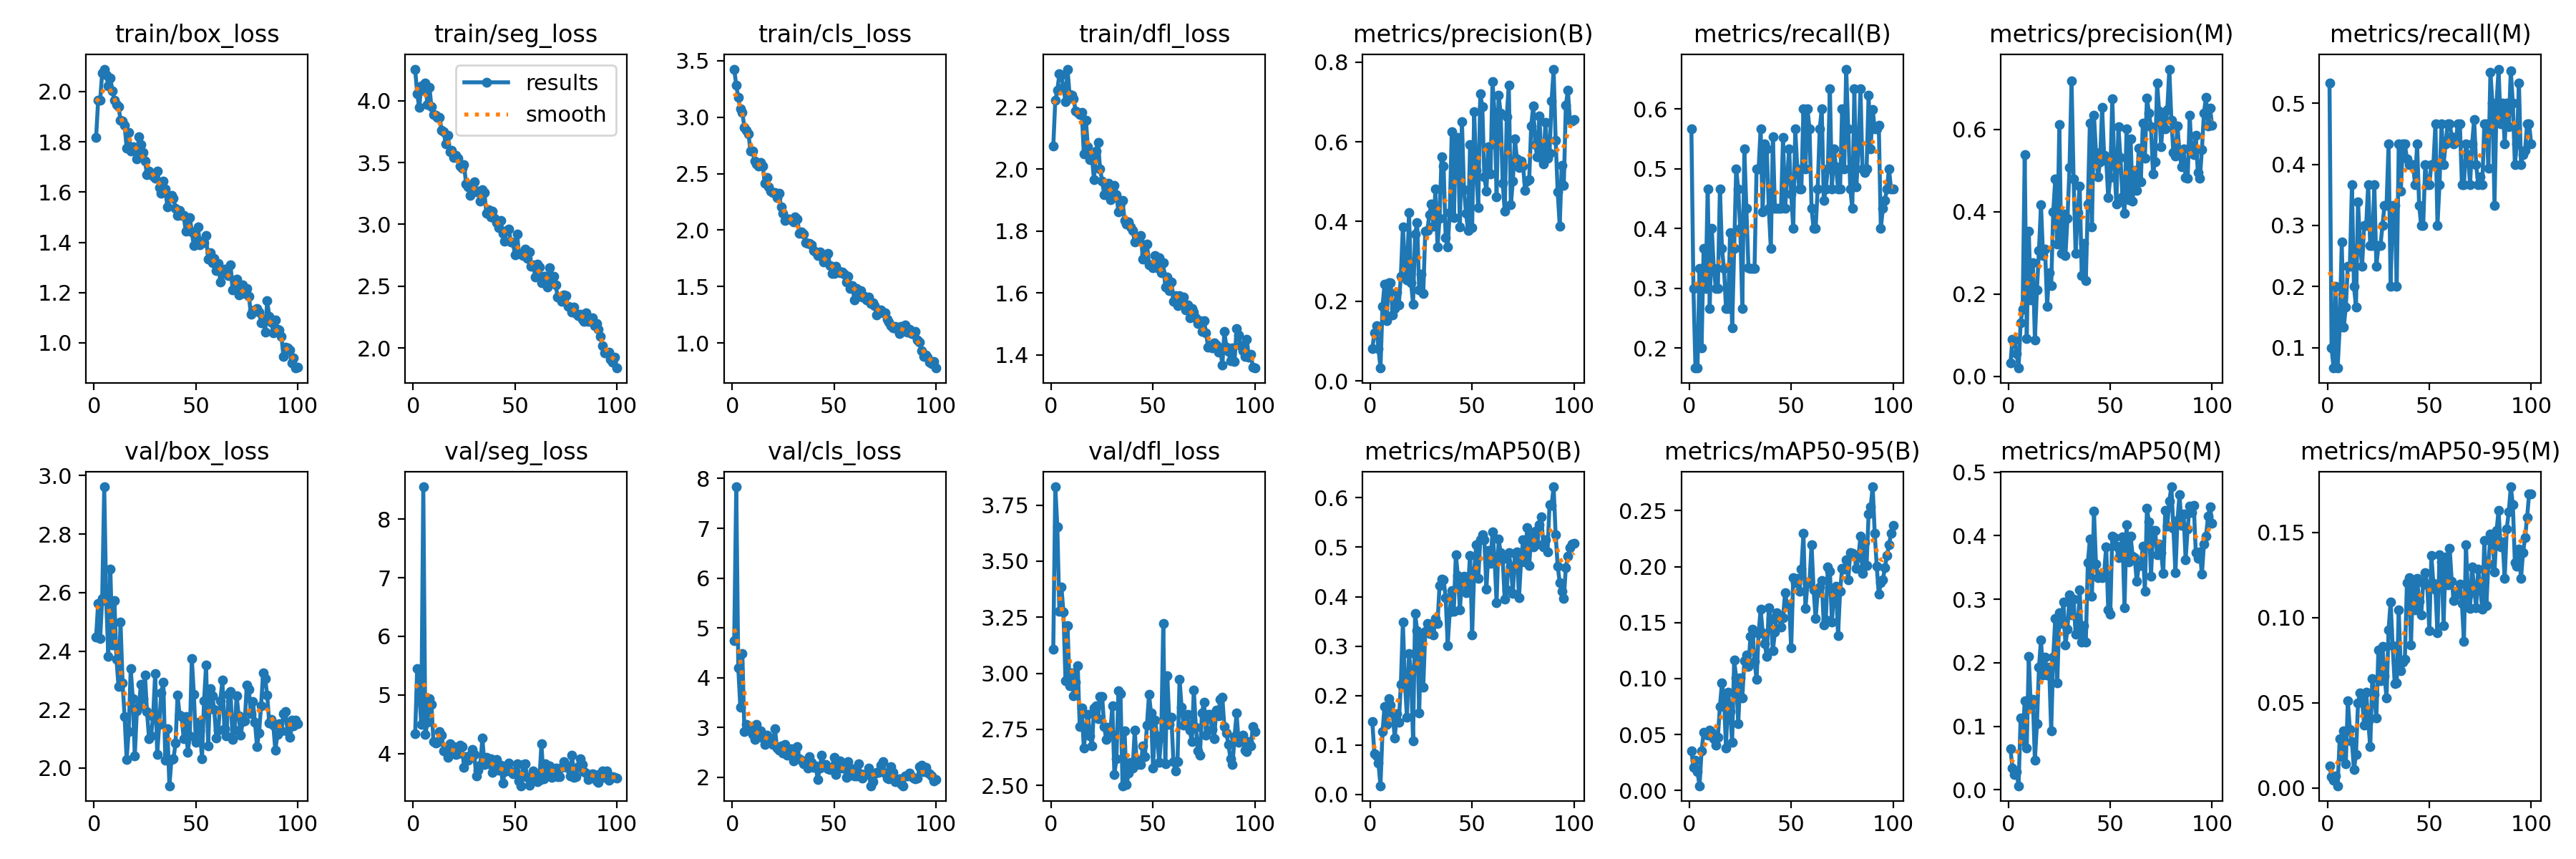

In [ ]:
Image("/content/drive/MyDrive/yolo8_segmentation/results/200_epochs-6/results.png")

In [24]:
my_new_model = YOLO('/content/drive/MyDrive/yolo8_segmentation/results/200_epochs-7/weights/best.pt')

In [27]:
new_image1 = '/content/drive/MyDrive/yolo8_segmentation/m.jpeg'
new_results = my_new_model.predict(new_image1,conf=0.5)  #Adjust conf threshold


image 1/1 /content/drive/MyDrive/yolo8_segmentation/m.jpeg: 544x800 1 damage, 449.6ms
Speed: 5.2ms preprocess, 449.6ms inference, 5.0ms postprocess per image at shape (1, 3, 544, 800)


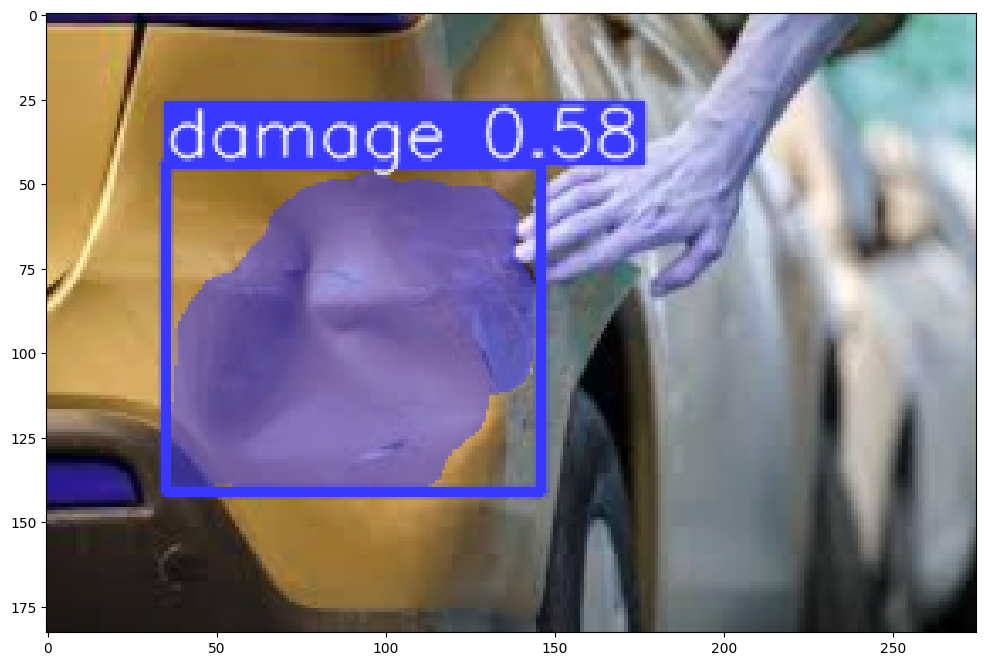

In [28]:
new_result_array = new_results[0].plot()
plt.figure(figsize=(12, 12))
plt.imshow(new_result_array)

Saving kj.jpeg to kj.jpeg


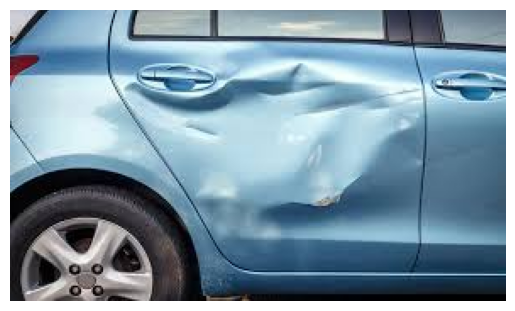


0: 480x800 1 damage, 270.3ms
Speed: 3.9ms preprocess, 270.3ms inference, 5.4ms postprocess per image at shape (1, 3, 480, 800)


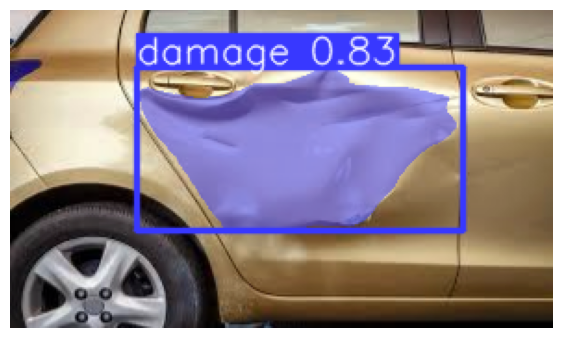

In [37]:
from google.colab import files
import matplotlib.pyplot as plt
import cv2  # Assuming you're using OpenCV for image manipulation
from ultralytics import YOLO

# Upload image file
uploaded = files.upload()

# Get the filename of the uploaded image
filename = next(iter(uploaded))

# Read the uploaded image using OpenCV
new_image2 = cv2.imread(filename)

# Display the uploaded image
plt.imshow(cv2.cvtColor(new_image2, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

# Initialize your YOLO model
my_new_model = YOLO('/content/drive/MyDrive/yolo8_segmentation/results/200_epochs-7/weights/best.pt')


new_results = my_new_model.predict(new_image2,conf=0.5)  #Adjust conf threshold
new_result_array = new_results[0].plot()
plt.figure(figsize=(7, 7))
plt.imshow(new_result_array)
plt.axis('off')
plt.show()